In [9]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [10]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('E:/Kaggle/Housing Prices Competitio/Data/train.csv')
test = pd.read_csv('E:/Kaggle/Housing Prices Competitio/Data/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
print ("Size of train data : {}".format(train.shape))
print ("Size of test data : {}".format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [12]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [13]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

Select numerical features

In [7]:
features_numerical = []
for col in train.columns:
    if ((train[col].dtypes=='int64') or (train[col].dtypes=='float64')):
        features_numerical.append(col)
print(features_numerical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Select categorical features

In [16]:
features_categorical = []
for col in train.columns:
    if not((train[col].dtypes=='int64') or (train[col].dtypes=='float64')):
        features_categorical.append(col)
print(features_categorical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Remove recommended outliers

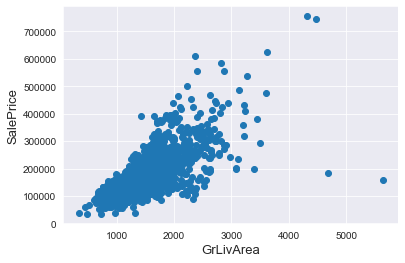

In [18]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)
plt.show()

In [20]:
train[(train['GrLivArea']>4000)].index

Int64Index([523, 691, 1182, 1298], dtype='int64')

In [22]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Correlation of variables investigation

In [32]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])> 0.5]
for feat in top_corr_features:
    print(feat) 
    print(corrmat[feat].dtypes)

OverallQual
float64
YearBuilt
float64
YearRemodAdd
float64
TotalBsmtSF
float64
1stFlrSF
float64
GrLivArea
float64
FullBath
float64
TotRmsAbvGrd
float64
GarageCars
float64
GarageArea
float64
SalePrice
float64


Categorical features transfrom with LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [36]:
for f in features_categorical:
    print(train[f].dtypes)

object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [42]:
print(train[features_categorical[2]].head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object


In [34]:
encoder = LabelEncoder()
encoded = train[features_categorical].apply(encoder.fit_transform)

TypeError: ('argument must be a string or number', 'occurred at index Alley')

Feature Engineering

Concatenate both train and test values.